**Regression (Logistic) – Titanic Survival Prediction**

In this project, I used Logistic Regression to predict whether passengers survived the Titanic disaster based on various features in the dataset. Here’s a breakdown of the process:
1.	Data Preparation: I cleaned the dataset by removing rows with missing values for Age and Embarked. Converted categorical variables like Sex (0 = male, 1 = female) and Embarked using dummy variables to prepare the data for model training. Selected relevant features such as Pclass, Sex, Age, Fare, and Embarked to use as predictors.
2.	Model Training: I used Logistic Regression to train the model on 80% of the dataset (training data) and tested the model on the remaining 20%. The model predicted whether a passenger survived (1) or not (0) based on the selected features.
3.	Evaluation:	After training the model, I evaluated its performance using metrics such as accuracy, precision, and recall, which helped assess how well the model was able to predict survival.

**Step 1: Load the Titanic Dataset**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

#Upload the Titanic dataset
uploaded = files.upload()

#Load the dataset into a DataFrame
titanic_df = pd.read_csv('Titanic-Dataset.csv')

titanic_df

Saving Titanic-Dataset.csv to Titanic-Dataset (2).csv


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
titanic_df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


<Axes: >

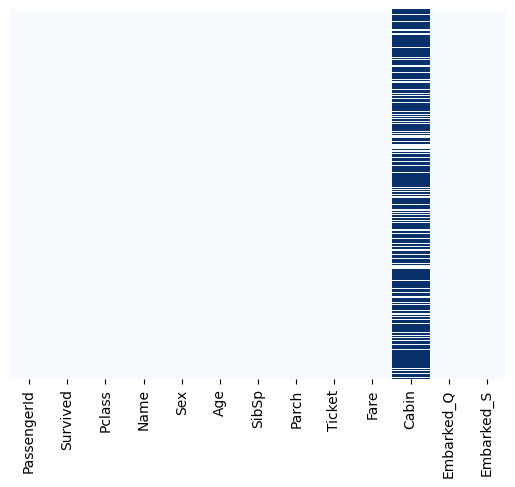

In [ ]:
sns.heatmap(titanic_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

**Step 2: Preprocess the Data**

In [ ]:
#Drop rows with missing 'Age' and 'Embarked'
titanic_df.dropna(subset=['Age', 'Embarked'], inplace=True)

#Convert 'Sex' to numeric
titanic_df['Sex'] = titanic_df['Sex'].map({'male': 0, 'female': 1})

#Create dummy variables for 'Embarked' (drop one to prevent multicollinearity)
titanic_df = pd.get_dummies(titanic_df, columns=['Embarked'], drop_first=True)

#Select features and target variable
X = titanic_df[['Pclass', 'Sex', 'Age', 'Fare', 'Embarked_Q', 'Embarked_S']]
y = titanic_df['Survived']

#Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

Training data shape: (569, 6)
Testing data shape: (143, 6)


**Step 3: Train the Logistic Regression Model**

In [ ]:
#Initialize logistic regression model
log_reg = LogisticRegression(max_iter=1000)

#Fit the model to the training data
log_reg.fit(X_train, y_train)

#Predict on the test data
y_pred = log_reg.predict(X_test)

In [ ]:
#Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 79.72%

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.93      0.84        80
           1       0.87      0.63      0.73        63

    accuracy                           0.80       143
   macro avg       0.82      0.78      0.79       143
weighted avg       0.81      0.80      0.79       143


Confusion Matrix:
[[74  6]
 [23 40]]


In [ ]:
# Accuracy: 79.72% indicates the model correctly predicted survival 79.72% of the time.

# Precision for class 0 (did not survive): 0.76 - The model is correct 76% of the time when predicting no survival.
# Precision for class 1 (survived): 0.87 - The model is correct 87% of the time when predicting survival.

# Recall for class 0 (did not survive): 0.93 - The model correctly identified 93% of those who did not survive.
# Recall for class 1 (survived): 0.63 - The model correctly identified 63% of those who survived.

# F1-Score: The balance between precision and recall, indicating overall effectiveness for each class.
# - F1-Score for class 0: 0.84 (high for predicting no survival).
# - F1-Score for class 1: 0.73 (lower for predicting survival, suggesting room for improvement).

# Confusion Matrix:
# - True Negatives (74): Correctly predicted "no survival."
# - False Positives (6): Predicted "survival" but was incorrect.
# - False Negatives (23): Predicted "no survival" but should have been survival.
# - True Positives (40): Correctly predicted "survival."

<Axes: >

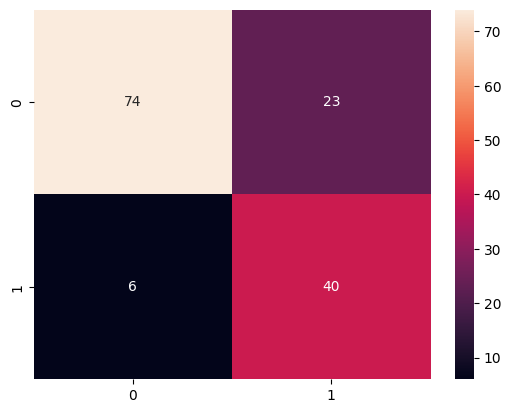

In [ ]:
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True)